In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [2]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [3]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

In [4]:
df

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129


In [5]:
X = df.drop(['total'], axis =1)
y = df['total']

In [6]:
y

0        222
1        222
2        222
3        222
4        222
        ... 
76009    129
76010    129
76011    129
76012    129
76013    129
Name: total, Length: 76014, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [8]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(216, activation='relu'), 
    keras.layers.Dense(1, activation='linear') 
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) 
model.compile(optimizer='adam', loss=huber_loss) 

In [11]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 7s 6ms/step - loss: 32.3525 - val_loss: 22.1126
Epoch 2/50
832/832 [==============================] - 5s 6ms/step - loss: 22.3558 - val_loss: 22.1780
Epoch 3/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2622 - val_loss: 22.0117
Epoch 4/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2216 - val_loss: 22.0976
Epoch 5/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1627 - val_loss: 21.8955
Epoch 6/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1415 - val_loss: 21.9207
Epoch 7/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1392 - val_loss: 21.8170
Epoch 8/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1441 - val_loss: 21.9364
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1153 - val_loss: 22.2133
Epoch 10/50
832/832 [==============================] - 5s 6ms/step - loss: 22.0635

<AxesSubplot:>

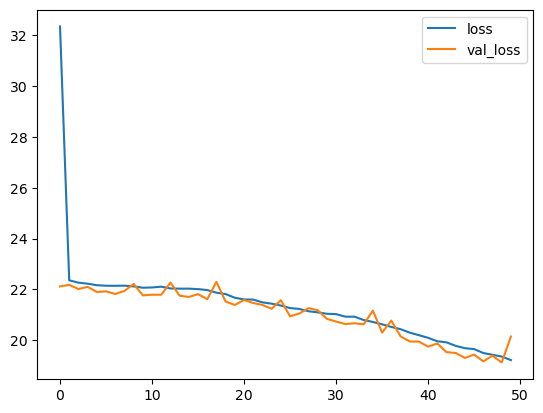

In [12]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [13]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 2s 3ms/step


20.63669213794925

In [35]:
from IPython.display import HTML, display
import ipywidgets as widgets

# Function to set the style of the widget description
def set_widget_description_style(widget, width):
    widget.style.description_width = f"{width}px"
    display(HTML("<style>.widget-label { width: " + str(width) + "px !important; }</style>"))

# Create dropdown widgets
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

# Set the style of the widget description to increase width
set_widget_description_style(venue, 150)
set_widget_description_style(batting_team, 150)
set_widget_description_style(bowling_team, 150)
set_widget_description_style(striker, 150)
set_widget_description_style(bowler, 150)

# Adjust the width of the widget container
venue.layout.width = 'auto'
batting_team.layout.width = 'auto'
bowling_team.layout.width = 'auto'
striker.layout.width = 'auto'
bowler.layout.width = 'auto'

predict_button = widgets.Button(description="Predict Score")

# Define the button's click event
def predict_score(b):
    with output:
        clear_output() 
        
        # Check if striker and bowler names are the same
        if striker.value == bowler.value:
            print("Error: Striker and Bowler cannot be the same.")
            return
        
        # Check if batting and bowling teams are the same
        if batting_team.value == bowling_team.value:
            print("Error: Batting and Bowling teams cannot be the same.")
            return

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
        input = input.reshape(1, 5)
        input = scaler.transform(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0, 0])

        print(predicted_score)

In [36]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', layout=Layout(width='auto'), options=('M Chinnaswamy Stadium', 'Punjab C…

Dropdown(description='Select Batting Team:', layout=Layout(width='auto'), options=('Kolkata Knight Riders', 'C…

Dropdown(description='Select Bowling Team:', layout=Layout(width='auto'), options=('Royal Challengers Bangalor…

Dropdown(description='Select Striker:', layout=Layout(width='auto'), options=('SC Ganguly', 'BB McCullum', 'RT…

Dropdown(description='Select Bowler:', layout=Layout(width='auto'), options=('P Kumar', 'Z Khan', 'AA Noffke',…

Button(description='Predict Score', style=ButtonStyle())

Output()